In [84]:
import numpy as np
import random
from qiskit import *
from qiskit.tools.visualization import plot_histogram

c:\users\sorin\anaconda3\envs\qiskit-env\lib\site-packages\qiskit\aqua\circuits\gates\controlled_ry_gate.py:51: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  if qubit >= self.n_qubits:
c:\users\sorin\anaconda3\envs\qiskit-env\lib\site-packages\qiskit\aqua\circuits\gates\controlled_ry_gate.py:51: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  if qubit >= self.n_qubits:
c:\users\sorin\anaconda3\envs\qiskit-env\lib\site-packages\qiskit\aqua\circuits\gates\controlled_ry_gate.py:51: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the Quantu

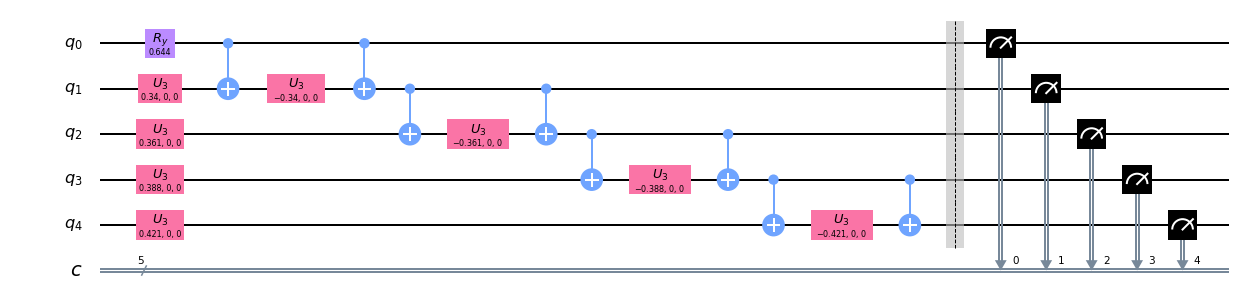

In [234]:
def getRotationForProbability(probability):
    return 2* np.arcsin(np.sqrt(probability))

n=5
circuit = QuantumCircuit(n,n)

total = 10
a = getRotationForProbability(1/total)
circuit.ry(a, 0)

for i in range(n-1):
    rot = getRotationForProbability(1/(total-1-i))
    circuit.cry(rot,i,i+1)
    

circuit.barrier()
    
# for i in range(n):
#     circuit.x(i)

# circuit.barrier()

circuit.measure(range(n),range(n))
circuit.draw(output='mpl')


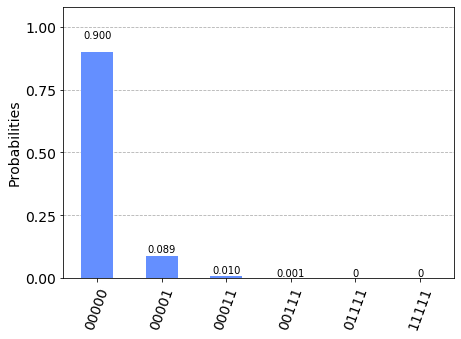

In [235]:

localSimulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, localSimulator, shots=1000000).result()
counts = result.get_counts(circuit)
plot_histogram(counts)